# Data Preprocessing
# In this section, we will preprocess the data to prepare it for analysis.

In [3]:
import pandas as pd
train_1 = pd.read_csv('data/train_1.csv', parse_dates=True)

In [4]:
# Fill missing values
train_1.fillna(0, inplace=True)
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
train_1.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [6]:
# page visit data from July 1 2015 to December 31 2016
train_data = pd.melt(train_1,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [7]:
# Convert 'Date' to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

Data Visualization
Average number of views per day

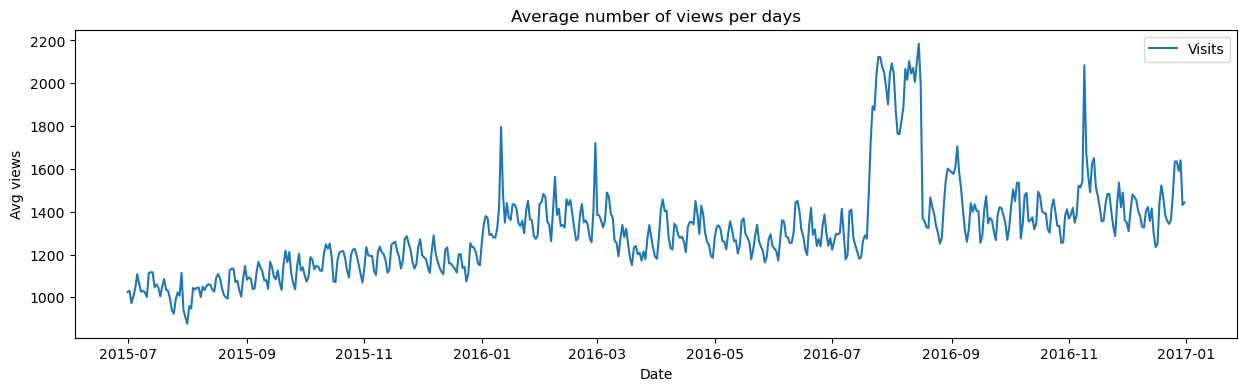

In [8]:
#visualising
import matplotlib.pyplot as plt
%matplotlib inline
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Avg views')
plt.title('Average number of views per days')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

Data Exploration
- Web Traffic by weekday (Use July to December because data is only available for these months in 2015)

In [9]:
# Add year, month and day columns
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

In [10]:
# plot web traffic by month
train_data['month_num'] = train_data['Month']
train_data['Month'].replace('7','7 - July',inplace=True)
train_data['Month'].replace('8','8 - August',inplace=True)
train_data['Month'].replace('9','9 - September',inplace=True)
train_data['Month'].replace('10','10 - October',inplace=True)
train_data['Month'].replace('11','11 - November',inplace=True)
train_data['Month'].replace('12','12 - December',inplace=True)

/tmp/ipykernel_5926/391260599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Month'].replace('7','7 - July',inplace=True)
/tmp/ipykernel_5926/391260599.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# not enough memory to handle all data at once
# filter data for months July to December
# train_limited = train_data[train_data['month_num']>=7]

In [ ]:
# load train_limited data
# total size of this file is 5.7GB
# train_limited = load_data('data/train_limited.csv')


In [ ]:
name = []
for page in train1['Page']:
    split = page.split('.')
    name.append(split[-3])

train1['Name'] = name
train1['Language'] = train1['Name'].str[-2:]